# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('merged_cleaned.csv')

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

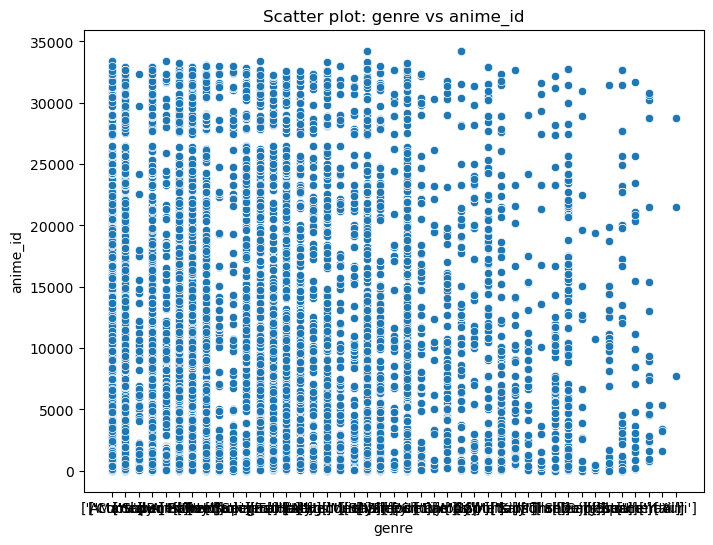

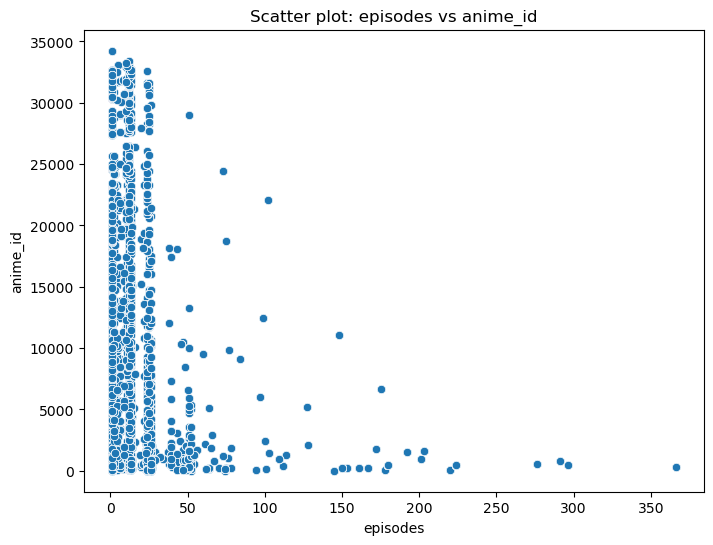

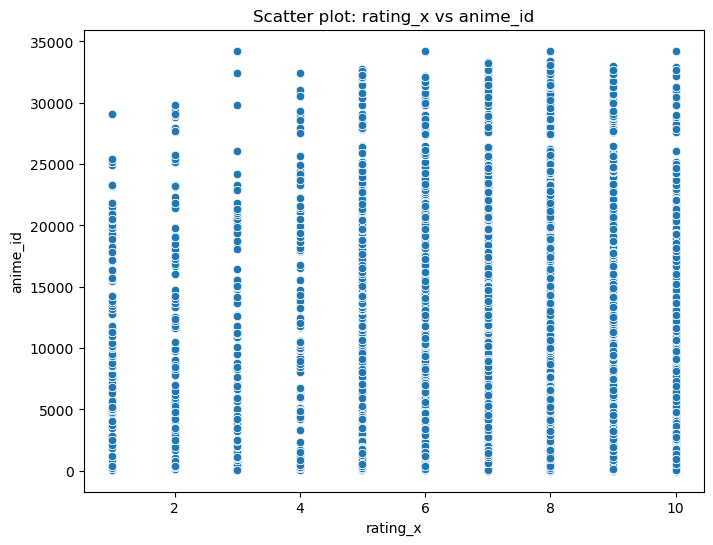

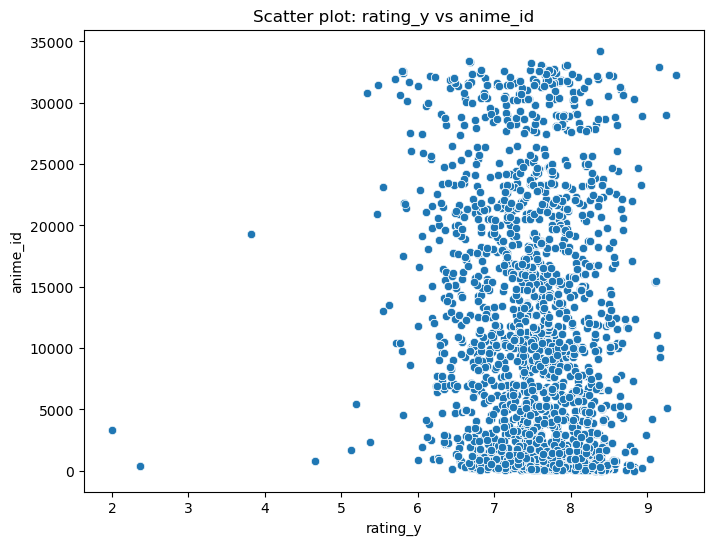

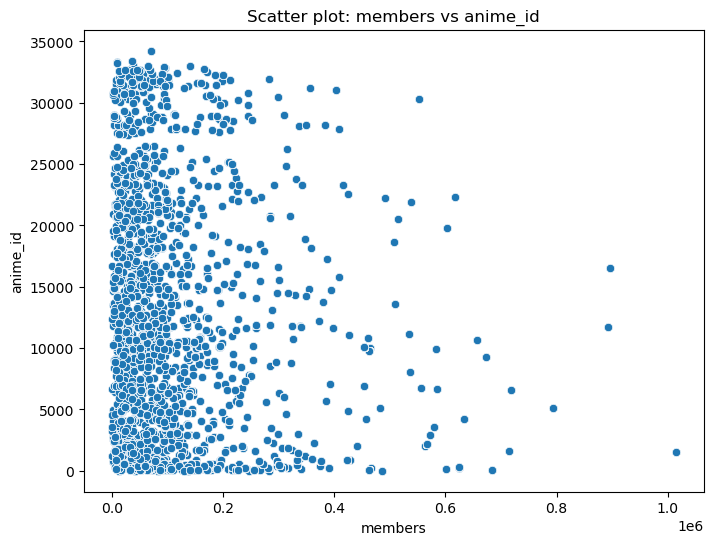

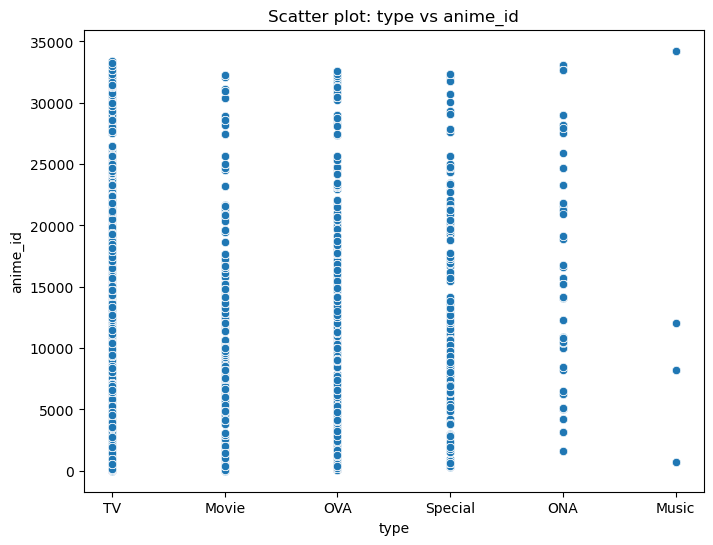

In [34]:
## Doing the scatter plot to find correlations and based on these I don't see a best match.
x_vars = ['genre', 'episodes', 'rating_x', 'rating_y', 'members', 'type']
y_var = 'anime_id'

for x_var in x_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_var, y=y_var)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f'Scatter plot: {x_var} vs {y_var}')
    plt.show()

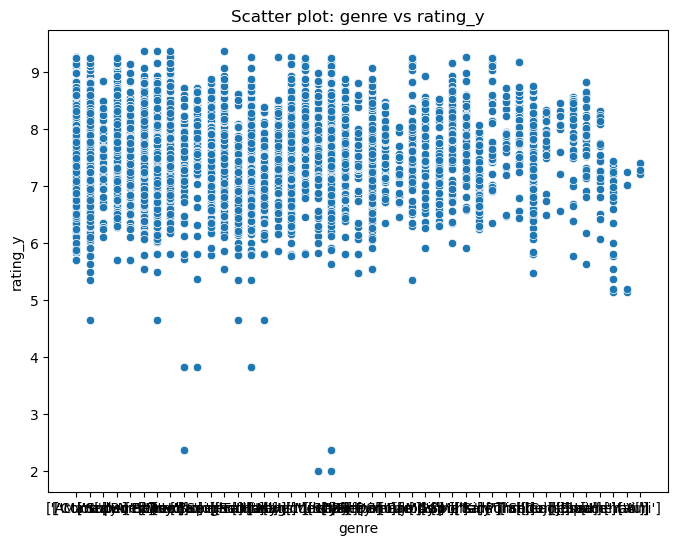

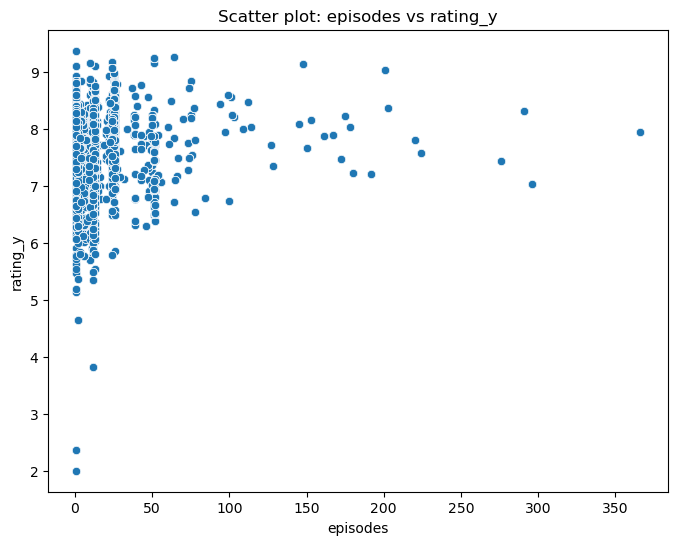

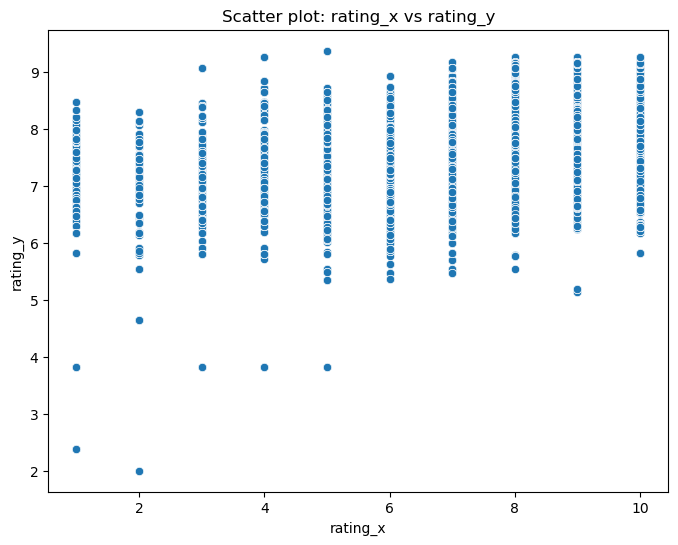

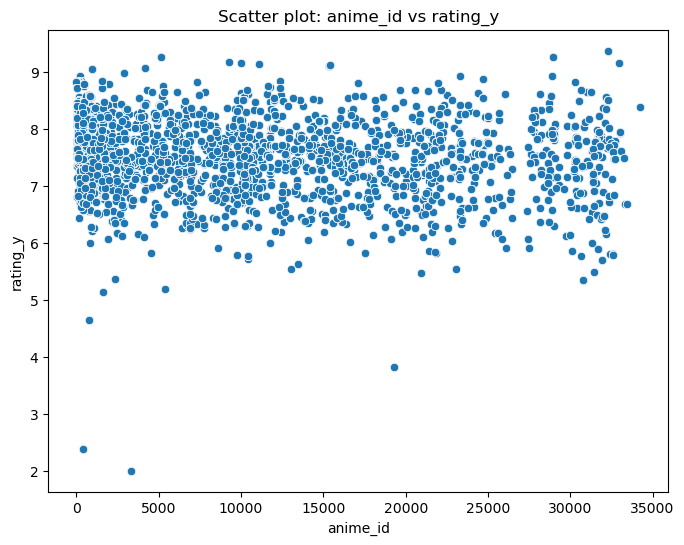

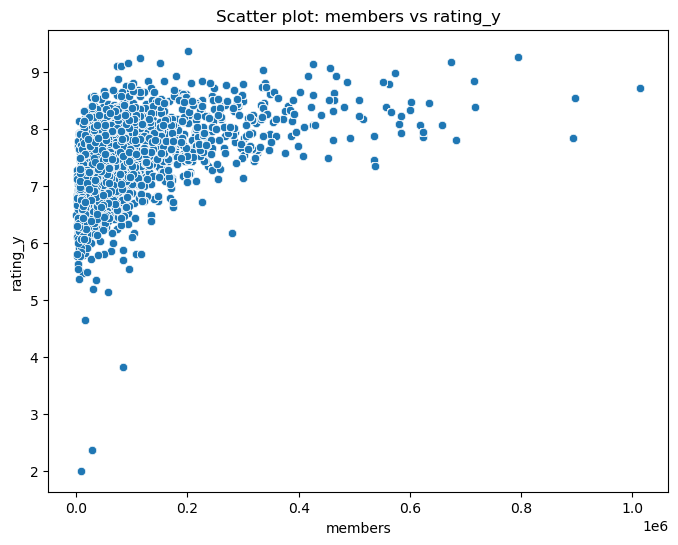

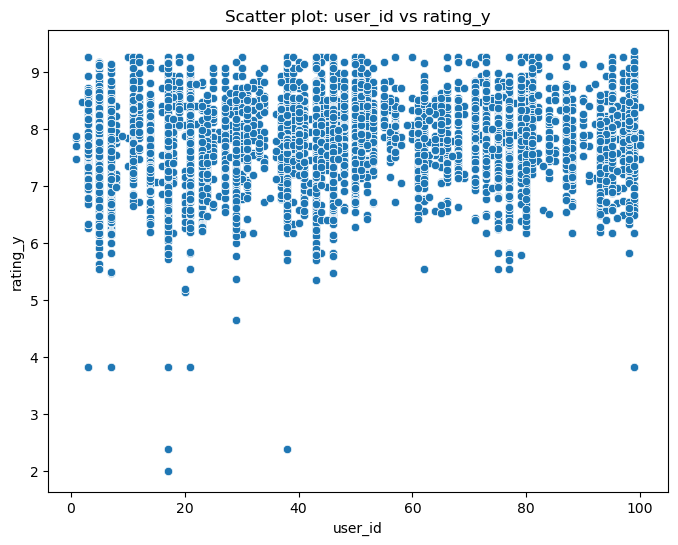

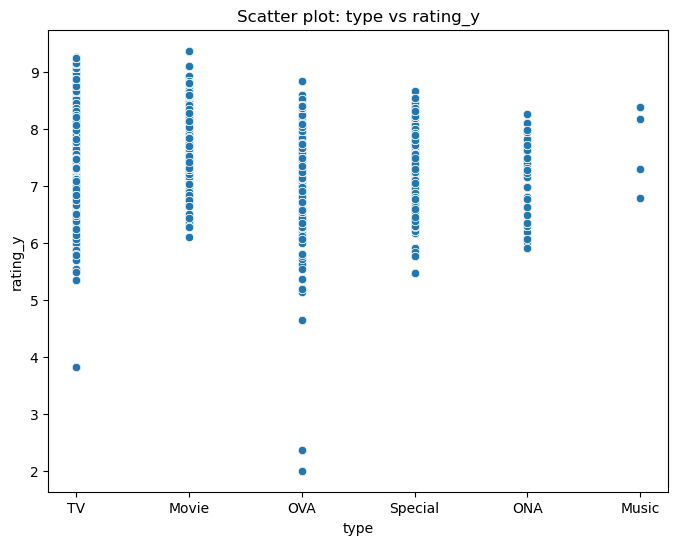

In [33]:
## it seems that rating_y which stands for average_rating and members have the most correlations.

x_vars = ['genre', 'episodes', 'rating_x', 'anime_id', 'members', 'user_id', 'type']
y_var = 'rating_y'

for x_var in x_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_var, y=y_var)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f'Scatter plot: {x_var} vs {y_var}')
    plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

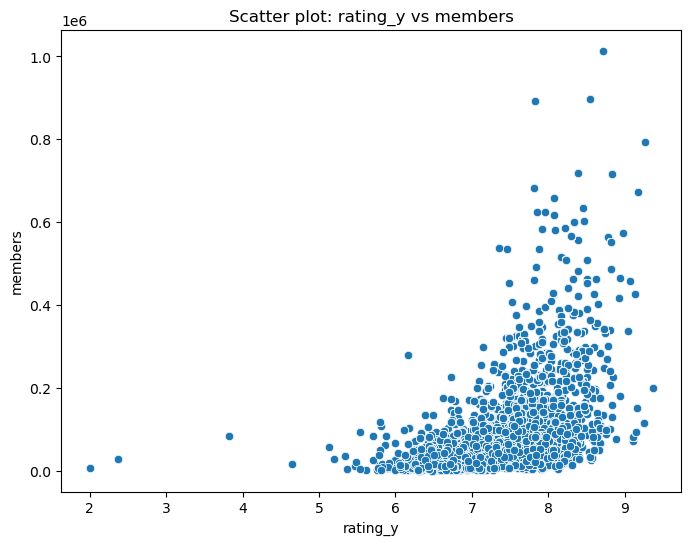

In [18]:
## Just to double check I did another code to find the best correlation.


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the pair of columns with the highest correlation
strongest_corr = correlation_matrix.unstack().sort_values(ascending=False)
strongest_corr = strongest_corr[strongest_corr != 1].head(1)
strongest_cols = strongest_corr.index.tolist()[0]

# Extract the column names
col1, col2 = strongest_cols

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=col1, y=col2)
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f'Scatter plot: {col1} vs {col2}')
plt.show()

                            OLS Regression Results                            
Dep. Variable:               rating_y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     9810.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:30:53   Log-Likelihood:                -22414.
No. Observations:               27829   AIC:                         4.483e+04
Df Residuals:                   27827   BIC:                         4.485e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4265      0.005   1525.153      0.0

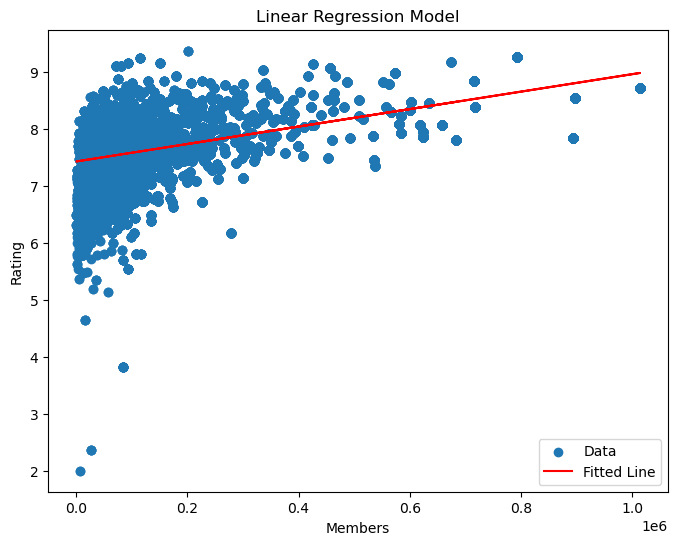

In [20]:
import statsmodels.api as sm

# Assign the input feature and target variable
X = df['members']
y = df['rating_y']

# Add a constant term to the input feature
X = sm.add_constant(X)

# Create and train the model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

# Plot the column values and the line produced by the model
plt.figure(figsize=(8, 6))
plt.scatter(df['members'], df['rating_y'], label='Data')
plt.plot(df['members'], results.fittedvalues, color='red', label='Fitted Line')
plt.xlabel('Members')
plt.ylabel('Rating')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

## Error Terms

Finally, plot your error terms!

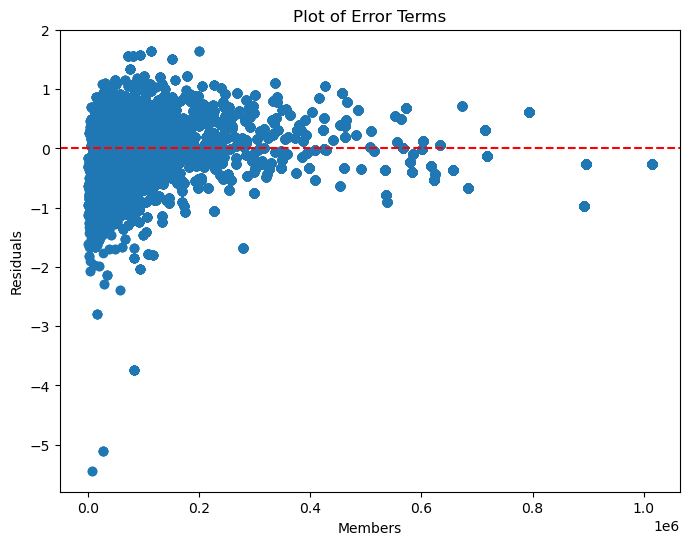

In [37]:
## Error Terms

# Calculate the residuals
residuals = results.resid

# Plot the error terms
plt.figure(figsize=(8, 6))
plt.scatter(df['members'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Members')
plt.ylabel('Residuals')
plt.title('Plot of Error Terms')
plt.show()

C:\Users\farkh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


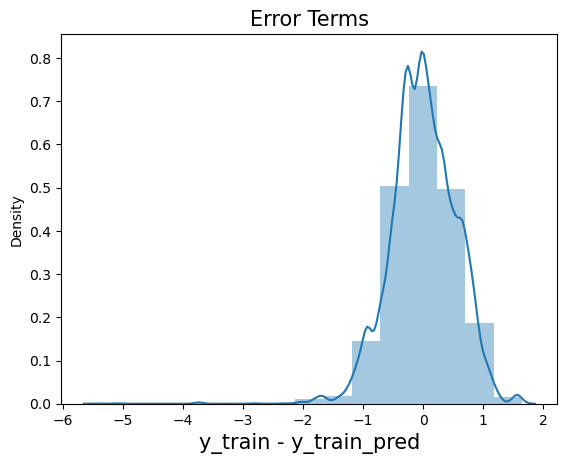

In [41]:
fig = plt.figure()
sns.distplot(residuals, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

1. What was your R-squared value?

The R-squared value is 0.261, indicating that the linear regression model explains approximately 26.1% of the variance in the dependent variable (rating_y).

2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset?

Based on the R-squared value of 0.261, it suggests that the linear regression model is not particularly effective in predicting the dependent variable (rating_y). The model explains only a small portion of the variability in the ratings, indicating that other factors not captured by the model may have a significant influence on the ratings.

3. Was your plot of the error terms a bell curve? Not really.

The plot of the error terms (residuals) does not appear to follow a perfect bell curve shape. The distribution may exhibit some deviations from normality, as indicated by the non-zero skewness (-0.521) and the non-zero kurtosis (6.166). This suggests that the assumptions of linear regression, including the normality of residuals, may not be fully met by the data.